# Titanic Survival Prediction — Multi-Model Comparison (scikit-learn)
## 1. Introduction
## 2. Import Libraries
## 3. Load Data
## 4. Exploratory Data Analysis (EDA)
## 5. Data Cleaning
## 6. Feature Engineering
## 7. Train/Test Split
## 8. Modeling with Pipelines
## 9. Cross-Validation Comparison
## 10. Hyperparameter Tuning
## 11. Evaluation on Test Set
## 12. Conclusion

## 1. Introduction

### In this Code, we use as many liberaries as possible, to compare the output.

## 2. Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 3.Load Data

In [5]:
train = pd.read_csv("/kaggle/input/titanic-scikit-multiple/train.csv")
test = pd.read_csv("/kaggle/input/titanic-scikit-multiple/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Exploratory Data Analysis (EDA)

In [6]:
train.info()
train.describe()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Graphs

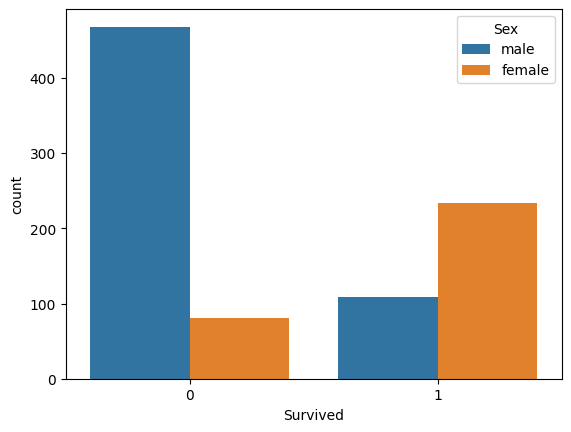

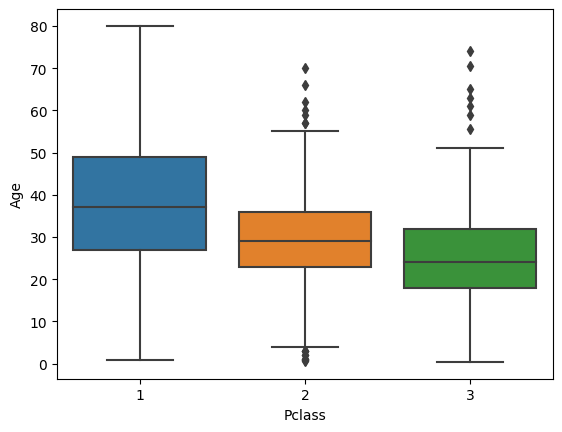

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


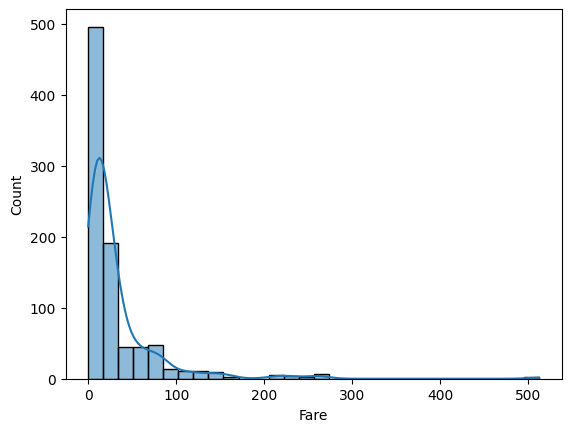

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


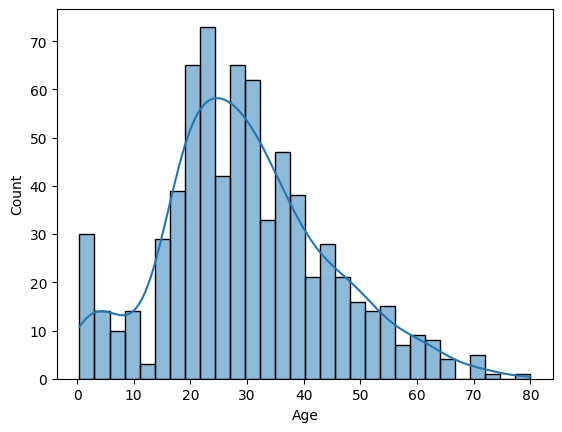

In [11]:

sns.countplot(data=train, x="Survived", hue="Sex")
plt.show()

sns.boxplot(data=train, x="Pclass", y="Age")
plt.show()

sns.histplot(train["Fare"], bins=30, kde=True)
plt.show()

sns.histplot(train["Age"], bins=30, kde=True)
plt.show()


## 5. Data Cleaning

In [15]:
data = train.copy()

data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

## 6. Feature Engineering

In [16]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
data["IsAlone"] = (data["FamilySize"] == 1).astype(int)

data["Title"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# Decrease Titles
rare_titles = ['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
data["Title"] = data["Title"].replace(rare_titles, "Rare")
data["Title"] = data["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

## 7. Train/Test Split

In [17]:
X = data.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
y = data["Survived"]

## 8. Modeling with Pipelines

In [19]:
numeric_features = ["Age", "Fare", "FamilySize"]
categorical_features = ["Sex", "Embarked", "Pclass", "Title", "IsAlone"]

## 9. Cross-Validation Comparison

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

## 10. Hyperparameter Tuning

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

## 11. Evaluation on Test Set

In [24]:
results = {}

for name, model in models.items():
    pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", model)
    ])

    cv_scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
    results[name] = cv_scores.mean()
    print(f"{name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Logistic Regression: 0.8215 ± 0.0205
Random Forest: 0.8036 ± 0.0257
Gradient Boosting: 0.8316 ± 0.0128
KNN: 0.8216 ± 0.0429
SVC: 0.8350 ± 0.0227


In [25]:
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Mean Accuracy": [round(results[m], 4) for m in results],
})

results_df


,Model,Mean Accuracy
0,Logistic Regression,0.8215
1,Random Forest,0.8036
2,Gradient Boosting,0.8316
3,KNN,0.8216
4,SVC,0.8350


# Compare Models

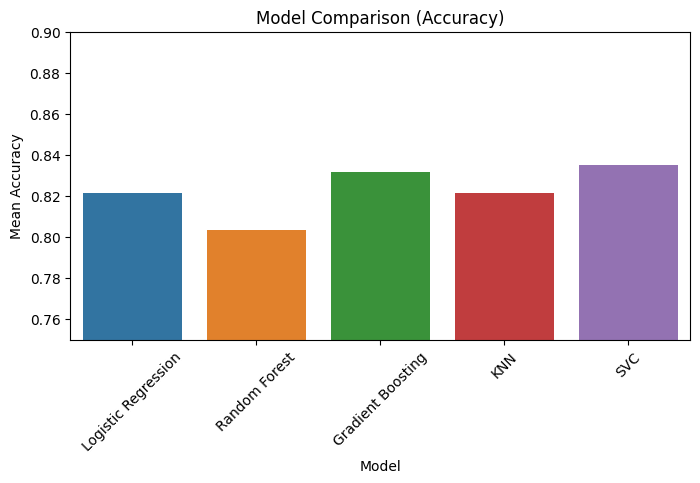

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="Mean Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.75, 0.90)
plt.title("Model Comparison (Accuracy)")
plt.show()


## Model Comparison — Analysis

Among all tested models, SVC achieved the highest accuracy (0.8350).  
However, Gradient Boosting showed more stability (lower variance) while maintaining competitive performance.  
Random Forest underperformed, likely due to limited feature richness and small dataset size.  
KNN showed high variance across folds, making it unreliable for generalization.
